In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import ast
import seaborn as sns

df = pd.read_csv('C:\\Users\\kylew\\OneDrive\\Desktop\\Netflix Project\\netflix_titles.csv')

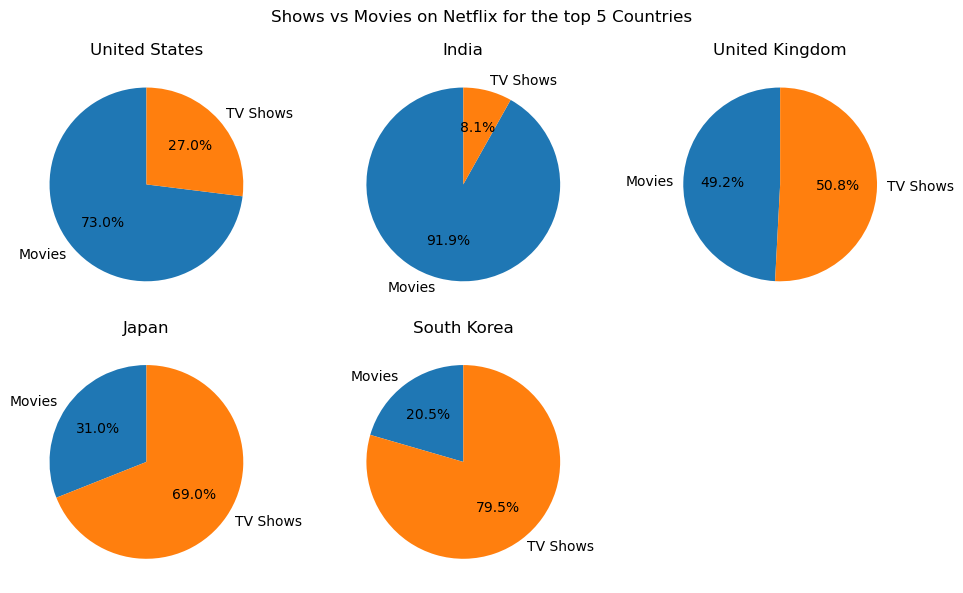

In [3]:
top_5 = df['country'].value_counts().head().reset_index()
top_5_countries = list(top_5['country'])
fig, ax = plt.subplots(2,3, figsize=(10,6))
fig.suptitle('Shows vs Movies on Netflix for the top 5 Countries')
labels = ['Movies', 'TV Shows']
ax[1,2].set_axis_off()
for i, country in enumerate(top_5_countries):
    country_df = df[df['country']==country]
    countrygby = country_df.groupby('type')['country'].value_counts().reset_index()
    ax[i//3,i%3].pie( countrygby['count'], autopct='%1.1f%%', startangle=90, labels = labels)
    ax[i//3,i%3].set_title(f'{country}')
    plt.tight_layout()
   




In [ ]:

df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
genre = df.explode('genre')
genre_gb = genre.groupby('country')['genre'].value_counts().reset_index()



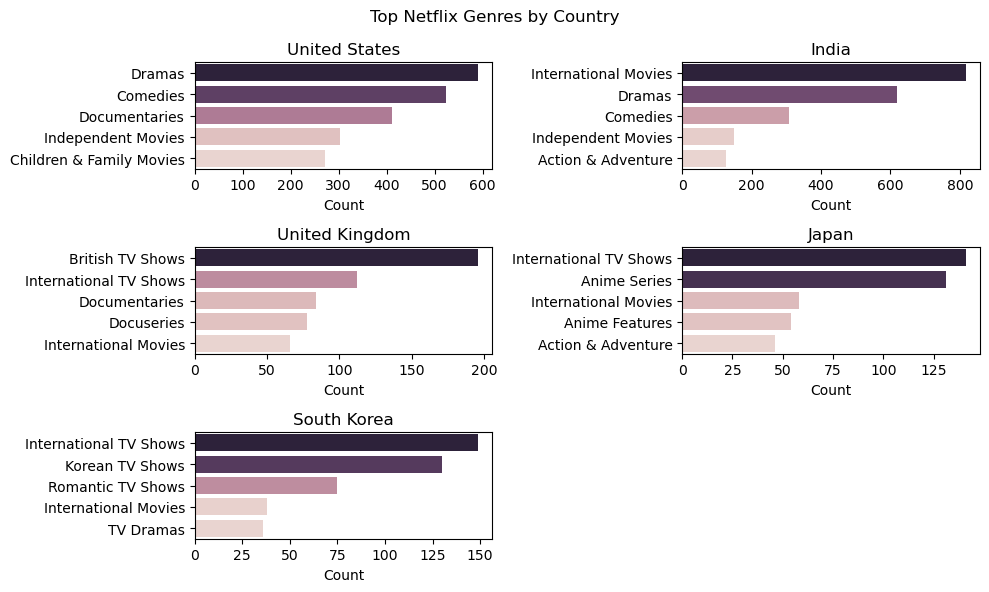

In [47]:
fig, ax = plt.subplots(3,2, figsize = (10,6))

fig.suptitle('Top Netflix Genres by Country')

for i, country in enumerate(top_5_countries):
    df_genre = genre_gb[genre_gb['country'] == country]
    df_genre = df_genre.sort_values(by= 'count', ascending=False).head(5)
    sns.barplot(data=df_genre, y= 'genre', x='count', ax=ax[i//2, i%2], hue='count', legend=False)
    ax[i//2, i%2].set_ylabel('')
    ax[i//2, i%2].set_xlabel('Count')
    ax[i//2, i%2].set_title(country)
    ax[2,1].set_axis_off()
    fig.tight_layout()


In [48]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[Documentaries]
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"[International TV Shows, Romantic TV Shows, TV..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,1-Nov-19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,"[Comedies, Horror Movies]"
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...","[Children & Family Movies, Comedies]"
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2-Mar-19,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,"[Dramas, International Movies, Music & Musicals]"
8807,s8808,TV Show,Parasyte: The Grey,Yeon Sang-ho,"Shin Hyun-been, Jeon Yeo-bin, Goo Kyo-hwan",South Korea,5-Apr-24,2024,TV-MA,1 Season,"Sci-fi, Horror, Action",A new breed of parasitic aliens arrive on Eart...,"[Sci-fi, Horror, Action]"
